## Classifying Counties as Hidden Gems from Metadata

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import copy
from itertools import compress
import sklearn.metrics as skm


import matplotlib.pyplot as plt
%matplotlib inline


In [191]:
df_metadata.shape

(101, 57)

In [3]:
# load data 

df_gems = pd.read_csv("data/Final_Hidden_Gems.csv") #hidden gem indicators

df_metadata = pd.read_csv("data/Top100Counties_metadata.csv",thousands=',').T #metadata for each county
df_metadata.columns = df_metadata.iloc[0,:] #make variable names into headers instead of its own row
df_metadata.drop(df_metadata.index[0], inplace=True) #get rid or rows with column names
df_metadata.reset_index(inplace=True)

df_metadata.rename(columns={"index":"County"}, inplace=True) #rename county column
df_metadata.rename_axis(None, axis=1, inplace=True)
df_metadata.drop(columns=["FIPS Code"], inplace=True) #get ride of ID column

display(df_metadata.head())

,County,"Population estimates base, April 1, 2020, (V2023)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)","Population, Census, April 1, 2020","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent","Persons 65 years and over, percent","Female persons, percent","White alone, percent",...,"Men-owned employer firms, Reference year 2017","Women-owned employer firms, Reference year 2017","Minority-owned employer firms, Reference year 2017","Nonminority-owned employer firms, Reference year 2017","Veteran-owned employer firms, Reference year 2017","Nonveteran-owned employer firms, Reference year 2017","Population per square mile, 2020","Population per square mile, 2010","Land area in square miles, 2020","Land area in square miles, 2010"
0,"Duval County, Florida","995,566",3.5%,"995,567","864,263",6.3%,22.2%,15.4%,51.4%,59.9%,...,"11,787","4,045","3,152","14,652","1,758","15,784","1,305.4","1,133.9",762.65,762.19
1,"St. Louis County, Missouri","1,004,305",-1.7%,"1,004,125","998,954",5.6%,21.7%,19.3%,52.1%,67.1%,...,"14,447","6,004","4,345","18,737","1,812","20,917","1,977.1","1,967.2",507.88,507.80
2,"Westchester County, New York","1,004,469",-1.4%,"1,004,457","949,113",5.1%,20.9%,18.4%,51.2%,72.2%,...,"18,052","5,328","5,660","19,754",934,"24,416","2,332.0","2,204.7",430.72,430.50
3,"Fresno County, California","1,008,646",0.8%,"1,008,654","930,450",6.9%,27.6%,12.9%,49.7%,75.3%,...,"8,464","2,310","4,222","8,310",752,"11,729",169.3,156.2,"5,958.38","5,957.99"
4,"Honolulu County, Hawaii","1,016,507",-2.7%,"1,016,508","953,207",5.6%,20.5%,19.6%,49.4%,21.2%,...,"8,927","3,381","9,389","4,403",S,"12,868","1,692.4","1,586.7",600.63,600.74


In [4]:
df_metadata.columns

Index(['County', 'Population estimates base, April 1, 2020, (V2023)',
       'Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)',
       'Population, Census, April 1, 2020',
       'Population, Census, April 1, 2010', 'Persons under 5 years, percent',
       'Persons under 18 years, percent', 'Persons 65 years and over, percent',
       'Female persons, percent', 'White alone, percent',
       'Black or African American alone, percent',
       'American Indian and Alaska Native alone, percent',
       'Asian alone, percent',
       'Native Hawaiian and Other Pacific Islander alone, percent',
       'Two or More Races, percent', 'Hispanic or Latino, percent',
       'White alone, not Hispanic or Latino, percent', 'Veterans, 2018-2022',
       'Foreign born persons, percent, 2018-2022',
       'Housing Units, July 1, 2023, (V2023)',
       'Owner-occupied housing unit rate, 2018-2022',
       'Median value of owner-occupied housing units, 2018-2022',
  

In [5]:
print(df_metadata.shape) #101 counties, 62 features not including county name

(101, 63)


In [6]:
df_metadata.drop(columns=['Population estimates base, April 1, 2020, (V2023)',
       'Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)',
       'Population, Census, April 1, 2020',
       'Population, Census, April 1, 2010', 'Land area in square miles, 2010','Population per square mile, 2010'], inplace=True)

In [7]:
#turn all feature columns into floats
df_metadata2 = df_metadata.copy()
df_metadata2.iloc[:,1:] = df_metadata2.iloc[:,1:].apply(lambda x: x.str.replace('%', ''))
df_metadata2.iloc[:,1:] = df_metadata2.iloc[:,1:].apply(lambda x: x.str.replace('$', ''))
df_metadata2.iloc[:,1:] = df_metadata2.iloc[:,1:].apply(lambda x: x.str.replace(',', ''))
df_metadata2.iloc[:,1:] = df_metadata2.iloc[:,1:].apply(pd.to_numeric, errors = 'coerce').astype(float)
display(df_metadata2.head())

,County,"Persons under 5 years, percent","Persons under 18 years, percent","Persons 65 years and over, percent","Female persons, percent","White alone, percent","Black or African American alone, percent","American Indian and Alaska Native alone, percent","Asian alone, percent","Native Hawaiian and Other Pacific Islander alone, percent",...,"Total nonemployer establishments, 2021","All employer firms, Reference year 2017","Men-owned employer firms, Reference year 2017","Women-owned employer firms, Reference year 2017","Minority-owned employer firms, Reference year 2017","Nonminority-owned employer firms, Reference year 2017","Veteran-owned employer firms, Reference year 2017","Nonveteran-owned employer firms, Reference year 2017","Population per square mile, 2020","Land area in square miles, 2020"
0,"Duval County, Florida",6.3,22.2,15.4,51.4,59.9,31.1,0.5,5.2,0.1,...,90290.0,20265.0,11787.0,4045.0,3152.0,14652.0,1758.0,15784.0,1305.4,762.65
1,"St. Louis County, Missouri",5.6,21.7,19.3,52.1,67.1,25.2,0.2,5.0,NaN,...,84856.0,25534.0,14447.0,6004.0,4345.0,18737.0,1812.0,20917.0,1977.1,507.88
2,"Westchester County, New York",5.1,20.9,18.4,51.2,72.2,17.0,1.1,6.9,0.1,...,102661.0,27684.0,18052.0,5328.0,5660.0,19754.0,934.0,24416.0,2332.0,430.72
3,"Fresno County, California",6.9,27.6,12.9,49.7,75.3,5.9,3.2,11.9,0.3,...,62643.0,14063.0,8464.0,2310.0,4222.0,8310.0,752.0,11729.0,169.3,5958.38
4,"Honolulu County, Hawaii",5.6,20.5,19.6,49.4,21.2,2.8,0.3,42.6,9.9,...,70379.0,16295.0,8927.0,3381.0,9389.0,4403.0,NaN,12868.0,1692.4,600.63


In [8]:
#turn all percent columns into ratios
percent_col = [x for x in df_metadata2.columns if "percent" in x]
#print(percent_col)

df_metadata2.loc[:,percent_col] = df_metadata2.loc[:,percent_col]/100
display(df_metadata2.head())

,County,"Persons under 5 years, percent","Persons under 18 years, percent","Persons 65 years and over, percent","Female persons, percent","White alone, percent","Black or African American alone, percent","American Indian and Alaska Native alone, percent","Asian alone, percent","Native Hawaiian and Other Pacific Islander alone, percent",...,"Total nonemployer establishments, 2021","All employer firms, Reference year 2017","Men-owned employer firms, Reference year 2017","Women-owned employer firms, Reference year 2017","Minority-owned employer firms, Reference year 2017","Nonminority-owned employer firms, Reference year 2017","Veteran-owned employer firms, Reference year 2017","Nonveteran-owned employer firms, Reference year 2017","Population per square mile, 2020","Land area in square miles, 2020"
0,"Duval County, Florida",0.063,0.222,0.154,0.514,0.599,0.311,0.005,0.052,0.001,...,90290.0,20265.0,11787.0,4045.0,3152.0,14652.0,1758.0,15784.0,1305.4,762.65
1,"St. Louis County, Missouri",0.056,0.217,0.193,0.521,0.671,0.252,0.002,0.05,NaN,...,84856.0,25534.0,14447.0,6004.0,4345.0,18737.0,1812.0,20917.0,1977.1,507.88
2,"Westchester County, New York",0.051,0.209,0.184,0.512,0.722,0.17,0.011,0.069,0.001,...,102661.0,27684.0,18052.0,5328.0,5660.0,19754.0,934.0,24416.0,2332.0,430.72
3,"Fresno County, California",0.069,0.276,0.129,0.497,0.753,0.059,0.032,0.119,0.003,...,62643.0,14063.0,8464.0,2310.0,4222.0,8310.0,752.0,11729.0,169.3,5958.38
4,"Honolulu County, Hawaii",0.056,0.205,0.196,0.494,0.212,0.028,0.003,0.426,0.099,...,70379.0,16295.0,8927.0,3381.0,9389.0,4403.0,NaN,12868.0,1692.4,600.63


In [9]:
#fill NaN with means
df_metadata2.iloc[:,1:] = df_metadata2.iloc[:,1:].apply(lambda x: x.fillna(x.mean()),axis=0)
print(df_metadata2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 57 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   County                                                                                  101 non-null    object
 1   Persons under 5 years, percent                                                          101 non-null    object
 2   Persons under 18 years, percent                                                         101 non-null    object
 3   Persons 65 years and over, percent                                                      101 non-null    object
 4   Female persons, percent                                                                 101 non-null    object
 5   White alone, percent                                                          

C:\Users\Kerstin\AppData\Local\Temp\ipykernel_18448\3806516417.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_metadata2.iloc[:,1:] = df_metadata2.iloc[:,1:].apply(lambda x: x.fillna(x.mean()),axis=0)


In [10]:
#df_metadata2.to_csv("data/Top100Counties_metadata_clean.csv")

In [11]:
df_gems.head()

,County,Pop_2020,Potential_Gem,Intake,Intake_Percentage,Net_Intake,Net_Intake_Percentge,Output,Output_Percentage,Gross_Change,Gross_Change_Percentage,Pos_Net,Gem
0,"Alameda County, California",1.518320e+10,1,6391600.0,0.000421,-392540.0,-0.000026,6784140.0,0.000447,13175740.0,0.000868,0,0
1,"Allegheny County, Pennsylvania",1.104974e+10,0,1380296.0,0.000125,-258876.0,-0.000023,1639172.0,0.000148,3019468.0,0.000273,0,0
2,"Baltimore County, Maryland",6.174153e+09,0,639965.0,0.000104,-19125.0,-0.000003,659090.0,0.000107,1299055.0,0.000210,0,0
3,"Bergen County, New Jersey",6.743723e+09,0,1756440.0,0.000260,259560.0,0.000038,1496880.0,0.000222,3253320.0,0.000482,1,0
4,"Bernalillo County, New Mexico",4.773045e+09,0,741636.0,0.000155,-61908.0,-0.000013,803544.0,0.000168,1545180.0,0.000324,0,0


In [12]:
#merge hidden gem status
df_metadata3 = df_metadata2.merge(df_gems[["County","Gem"]], on="County", how="inner") #inner join bc there are 100 on gem df and 101 in metadata
display(df_metadata3.head())

,County,"Persons under 5 years, percent","Persons under 18 years, percent","Persons 65 years and over, percent","Female persons, percent","White alone, percent","Black or African American alone, percent","American Indian and Alaska Native alone, percent","Asian alone, percent","Native Hawaiian and Other Pacific Islander alone, percent",...,"All employer firms, Reference year 2017","Men-owned employer firms, Reference year 2017","Women-owned employer firms, Reference year 2017","Minority-owned employer firms, Reference year 2017","Nonminority-owned employer firms, Reference year 2017","Veteran-owned employer firms, Reference year 2017","Nonveteran-owned employer firms, Reference year 2017","Population per square mile, 2020","Land area in square miles, 2020",Gem
0,"Duval County, Florida",0.063,0.222,0.154,0.514,0.599,0.311,0.005,0.052,0.001,...,20265.0,11787.0,4045.0,3152.0,14652.0,1758.0,15784.0,1305.4,762.65,0
1,"St. Louis County, Missouri",0.056,0.217,0.193,0.521,0.671,0.252,0.002,0.05,0.003957,...,25534.0,14447.0,6004.0,4345.0,18737.0,1812.0,20917.0,1977.1,507.88,0
2,"Westchester County, New York",0.051,0.209,0.184,0.512,0.722,0.17,0.011,0.069,0.001,...,27684.0,18052.0,5328.0,5660.0,19754.0,934.0,24416.0,2332.0,430.72,0
3,"Fresno County, California",0.069,0.276,0.129,0.497,0.753,0.059,0.032,0.119,0.003,...,14063.0,8464.0,2310.0,4222.0,8310.0,752.0,11729.0,169.3,5958.38,0
4,"Honolulu County, Hawaii",0.056,0.205,0.196,0.494,0.212,0.028,0.003,0.426,0.099,...,16295.0,8927.0,3381.0,9389.0,4403.0,1516.25,12868.0,1692.4,600.63,0


In [13]:
# create X and y
m,n = df_metadata3.shape
county = df_metadata3.County
X = df_metadata3.iloc[:,1:n-1]
X = preprocessing.scale(X)
y = df_metadata3.iloc[:,n-1]


In [14]:
X

array([[ 0.98029493,  0.1711973 , -0.22075711, ..., -0.351022  ,
        -0.29578936, -0.25875028],
       [-0.06895041, -0.00901038,  1.02339425, ..., -0.13990003,
        -0.22373335, -0.35573887],
       [-0.81841136, -0.29734267,  0.7362824 , ...,  0.00401498,
        -0.18566177, -0.38511297],
       ...,
       [ 1.13018712, -0.47755035, -0.89068477, ..., -0.53594395,
        -0.28335629, -0.35733016],
       [ 1.13018712,  1.14431876, -0.1888558 , ..., -0.51739418,
        -0.30991736, -0.33200661],
       [ 0.53061836,  0.38744651,  0.35346659, ..., -0.60619455,
        -0.37070959, -0.12593489]])

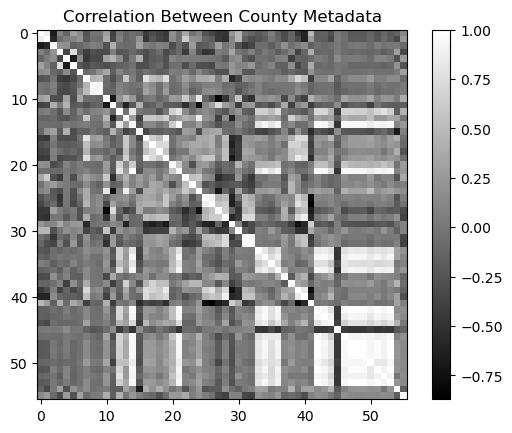

In [15]:
#correlation plot
plt.imshow(np.corrcoef(X,rowvar=False), cmap="gray")
plt.colorbar()
plt.savefig("corrmx1.png")
plt.title("Correlation Between County Metadata")
plt.show()
#some very correlated columns

### Will first build models using all features

In [327]:
# split data into train and test
#80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)


In [18]:
np.sum(y_test)

4

In [19]:
gnb = GaussianNB(var_smoothing=1e-3)

y_pred_nb = gnb.fit(X_train, y_train).predict(X_test)

nb_accuracy = float(np.sum(y_test == y_pred_nb)/y_test.shape[0])

print(f"Naive Bayes accuracy = {nb_accuracy}")
print(f"Naive Bayes F1 = {skm.f1_score(y_test, y_pred_nb, average='binary')}")

Naive Bayes accuracy = 0.6666666666666666
Naive Bayes F1 = 0.16666666666666666


In [20]:
# Logistic Regression

lr = LogisticRegression(random_state=10)

y_pred_lr = lr.fit(X_train, y_train).predict(X_test)

lr_accuracy = float(np.sum(y_test == y_pred_lr)/y_test.shape[0])

print(f"Logistic Regression accuracy = {lr_accuracy}")
print(f"Logistic Regression F1 = {skm.f1_score(y_test, y_pred_lr, average='binary')}")

Logistic Regression accuracy = 0.8333333333333334
Logistic Regression F1 = 0.4444444444444444


In [21]:
for kk in range(1,11):

    knn = KNeighborsClassifier(n_neighbors = kk)

    y_pred_knn = knn.fit(X_train, y_train).predict(X_test)

    knn_accuracy = float(np.sum(y_test == y_pred_knn)/y_test.shape[0])

    print(f"KNN accuracy with {kk} neighbors = {knn_accuracy}")
    print(f"KNN F1 Score with {kk} neighbors = {skm.f1_score(y_test, y_pred_knn, average='binary')}")



KNN accuracy with 1 neighbors = 0.8333333333333334
KNN F1 Score with 1 neighbors = 0.2857142857142857
KNN accuracy with 2 neighbors = 0.8333333333333334
KNN F1 Score with 2 neighbors = 0.2857142857142857
KNN accuracy with 3 neighbors = 0.8333333333333334
KNN F1 Score with 3 neighbors = 0.2857142857142857
KNN accuracy with 4 neighbors = 0.9
KNN F1 Score with 4 neighbors = 0.4
KNN accuracy with 5 neighbors = 0.9
KNN F1 Score with 5 neighbors = 0.4
KNN accuracy with 6 neighbors = 0.9
KNN F1 Score with 6 neighbors = 0.4
KNN accuracy with 7 neighbors = 0.9
KNN F1 Score with 7 neighbors = 0.4
KNN accuracy with 8 neighbors = 0.9
KNN F1 Score with 8 neighbors = 0.4
KNN accuracy with 9 neighbors = 0.9
KNN F1 Score with 9 neighbors = 0.4
KNN accuracy with 10 neighbors = 0.8666666666666667
KNN F1 Score with 10 neighbors = 0.0


In [22]:
lsvm = SVC(kernel="linear", C=0.025) #need to tune
y_pred_lsvm = lsvm.fit(X_train, y_train).predict(X_test)
lsvm_accuracy = float(np.sum(y_test == y_pred_lsvm)/y_test.shape[0])

print(f"Linear SVM accuracy = {lsvm_accuracy}")
print(f"LSVM F1 Score = {skm.f1_score(y_test, y_pred_lsvm, average='binary')}")

Linear SVM accuracy = 0.8333333333333334
LSVM F1 Score = 0.0


In [23]:
ksvm = SVC(kernel="rbf", C=1) #need to tune C and Kernel
y_pred_ksvm = ksvm.fit(X_train, y_train).predict(X_test)
ksvm_accuracy = float(np.sum(y_test == y_pred_ksvm)/y_test.shape[0])

print(f"Kernel SVM accuracy = {ksvm_accuracy}")
print(f"KSVM F1 Score = {skm.f1_score(y_test, y_pred_ksvm, average='binary')}")

Kernel SVM accuracy = 0.8666666666666667
KSVM F1 Score = 0.0


In [24]:
print("Neural Network")
mlp = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=150, alpha=1e-4,

                    solver='sgd', verbose=10, random_state=1,

                    learning_rate_init=.1, tol=1e-3)

y_pred_nn = mlp.fit(X_train, y_train).predict(X_test)
nn_accuracy = float(np.sum(y_test == y_pred_nn)/y_test.shape[0])

print(f"Neural Network accuracy = {nn_accuracy}")
print(f"NN F1 Score = {skm.f1_score(y_test, y_pred_nn, average='binary')}")
print(y_pred_nn)

Neural Network
Iteration 1, loss = 0.67780878
Iteration 2, loss = 0.50772055
Iteration 3, loss = 0.39061932
Iteration 4, loss = 0.32396847
Iteration 5, loss = 0.27854238
Iteration 6, loss = 0.24532254
Iteration 7, loss = 0.21786377
Iteration 8, loss = 0.19163779
Iteration 9, loss = 0.16565835
Iteration 10, loss = 0.14169967
Iteration 11, loss = 0.12277784
Iteration 12, loss = 0.10674478
Iteration 13, loss = 0.09227027
Iteration 14, loss = 0.07771262
Iteration 15, loss = 0.06326145
Iteration 16, loss = 0.05077106
Iteration 17, loss = 0.04110006
Iteration 18, loss = 0.03375114
Iteration 19, loss = 0.02812383
Iteration 20, loss = 0.02343707
Iteration 21, loss = 0.01946337
Iteration 22, loss = 0.01610620
Iteration 23, loss = 0.01329032
Iteration 24, loss = 0.01095462
Iteration 25, loss = 0.00906723
Iteration 26, loss = 0.00755532
Iteration 27, loss = 0.00632947
Iteration 28, loss = 0.00534010
Iteration 29, loss = 0.00454296
Iteration 30, loss = 0.00390239
Iteration 31, loss = 0.00338146
It

In [347]:
pca = PCA(n_components=3)

X_r = pca.fit(X).transform(X)
print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_r, y, test_size=0.3, random_state=10, stratify=y)

#NB
gnb2 = GaussianNB(var_smoothing=1e-3)
y_pred_nb2 = gnb2.fit(X_train2, y_train2).predict(X_test2)
nb_accuracy2 = float(np.sum([y_test2 == y_pred_nb2])/y_test2.shape[0])
print(f"Naive Bayes accuracy = {nb_accuracy2}")
print(f"NB F1 Score = {skm.f1_score(y_test2, y_pred_nb2, average='binary')}")

#LR
# Logistic Regression
lr2 = LogisticRegression(random_state=10)
y_pred_lr2 = lr2.fit(X_train2, y_train2).predict(X_test2)
lr_accuracy2 = float(np.sum(y_test2 == y_pred_lr2)/y_test2.shape[0])
print(f"Logistic Regression accuracy = {lr_accuracy2}")
print(f"LR F1 Score = {skm.f1_score(y_test2, y_pred_lr2, average='binary')}")


#KNN
for kk in range(1,11):
    knn2 = KNeighborsClassifier(n_neighbors = kk)
    y_pred_knn2 = knn2.fit(X_train2, y_train2).predict(X_test2)
    knn_accuracy2 = float(np.sum(y_test2 == y_pred_knn2)/y_test2.shape[0])
    print(f"KNN accuracy with {kk} neighbors = {knn_accuracy2}")
    print(f"KNN F1 Score with {kk} neighbors = {skm.f1_score(y_test2, y_pred_knn2, average='binary')}")

lsvm2 = SVC(kernel="linear", C=0.025) #need to tune
y_pred_lsvm2 = lsvm2.fit(X_train2, y_train2).predict(X_test2)
lsvm_accuracy2 = float(np.sum(y_test2 == y_pred_lsvm2)/y_test2.shape[0])

print(f"Linear SVM accuracy = {lsvm_accuracy2}")
print(f"LSVM F1 Score = {skm.f1_score(y_test2, y_pred_lsvm2, average='binary')}")

ksvm2 = SVC(kernel="rbf", C=1) #need to tune
y_pred_ksvm2 = ksvm2.fit(X_train2, y_train2).predict(X_test2)
ksvm_accuracy2 = float(np.sum(y_test2 == y_pred_ksvm2)/y_test2.shape[0])

print(f"Kernel SVM accuracy = {ksvm_accuracy2}")
print(f"KSVM F1 Score = {skm.f1_score(y_test2, y_pred_ksvm2, average='binary')}")

print("Neural Network")
mlp2 = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=300, alpha=1e-4,

                    solver='sgd', verbose=10, random_state=1,

                    learning_rate_init=.1, tol=1e-3)

y_pred_nn2 = mlp2.fit(X_train2, y_train2).predict(X_test2)
nn_accuracy2 = float(np.sum(y_test2 == y_pred_nn2)/y_test2.shape[0])

print(f"Neural Network accuracy = {nn_accuracy2}")
print(f"NN F1 Score = {skm.f1_score(y_test2, y_pred_nn2, average='binary')}")



explained variance ratio (first two components): [0.30826855 0.18240745 0.10771654]
Naive Bayes accuracy = 0.8333333333333334
NB F1 Score = 0.0
Logistic Regression accuracy = 0.9
LR F1 Score = 0.4
KNN accuracy with 1 neighbors = 0.8
KNN F1 Score with 1 neighbors = 0.0
KNN accuracy with 2 neighbors = 0.8333333333333334
KNN F1 Score with 2 neighbors = 0.0
KNN accuracy with 3 neighbors = 0.8333333333333334
KNN F1 Score with 3 neighbors = 0.0
KNN accuracy with 4 neighbors = 0.8666666666666667
KNN F1 Score with 4 neighbors = 0.0
KNN accuracy with 5 neighbors = 0.8333333333333334
KNN F1 Score with 5 neighbors = 0.2857142857142857
KNN accuracy with 6 neighbors = 0.9
KNN F1 Score with 6 neighbors = 0.4
KNN accuracy with 7 neighbors = 0.8666666666666667
KNN F1 Score with 7 neighbors = 0.3333333333333333
KNN accuracy with 8 neighbors = 0.9
KNN F1 Score with 8 neighbors = 0.4
KNN accuracy with 9 neighbors = 0.9
KNN F1 Score with 9 neighbors = 0.4
KNN accuracy with 10 neighbors = 0.866666666666666

In [333]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_r, y, test_size=0.3, random_state=10, stratify=y)

Accuracy gets better with dimension reduction, F-1 Score still sucks. There are also a lot of really correlation variables, will do feature selection via Lasso.

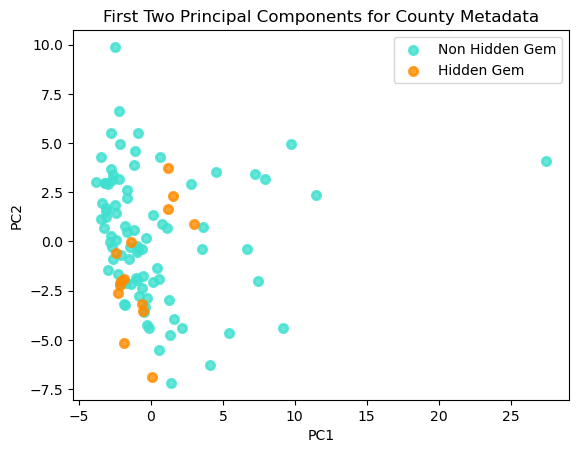

In [27]:
colors = ['turquoise', 'darkorange']
lw = 2
target_names = ["Non Hidden Gem", "Hidden Gem"]

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First Two Principal Components for County Metadata")
plt.savefig("PCA.png")
plt.show()

In [28]:
# Logistic Regression LASSO
lr_lasso = LogisticRegression(random_state=10, penalty='l1', solver='liblinear')
lr_lasso.fit(X_train, y_train)
lasso_coef = lr_lasso.coef_
y_pred_lr_lasso = lr_lasso.predict(X_test)
lr_accuracy_lasso = float(np.sum(y_test == y_pred_lr_lasso)/y_test.shape[0])
print(f"Logistic Regression accuracy = {lr_accuracy_lasso}")
print(f"LR F1 Score = {skm.f1_score(y_test, y_pred_lr_lasso, average='binary')}")


Logistic Regression accuracy = 0.8666666666666667
LR F1 Score = 0.5


In [29]:
print(lasso_coef)

[[ 0.          0.61744616  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.03727327
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.27035629  0.          0.39036844  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.4855928   0.68473374  0.          0.         -0.47633239
   0.          0.          0.          0.76379707  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.00063936]]


In [30]:
selected_features_mask = [lasso_coef != 0]
selected_features = np.array(df_metadata3.iloc[:,1:n-1].columns)[selected_features_mask[0][0]]
print(selected_features)

['Persons under 18 years, percent'
 'White alone, not Hispanic or Latino, percent'
 'Households with a computer, percent, 2018-2022'
 'High school graduate or higher, percent of persons age 25 years+, 2018-2022'
 'Total retail sales per capita, 2017'
 'Mean travel time to work (minutes), workers age 16 years+, 2018-2022'
 'Persons in poverty, percent'
 'Total employment, percent change, 2020-2021'
 'Land area in square miles, 2020']


In [31]:
selected_features_array = np.append(selected_features,["County", "Gem"])

In [32]:
lr_elastic = LogisticRegression(random_state=10, penalty='l2', solver='liblinear')
lr_elastic.fit(X_train, y_train)
elastic_coef = lr_elastic.coef_
y_pred_lr_elastic = lr_elastic.predict(X_test)
lr_accuracy_elastic = float(np.sum(y_test == y_pred_lr_elastic)/y_test.shape[0])
print(f"Logistic Regression accuracy = {lr_accuracy_elastic}")
print(f"LR F1 Score = {skm.f1_score(y_test, y_pred_lr_elastic, average='binary')}")


Logistic Regression accuracy = 0.8
LR F1 Score = 0.4


In [33]:
selected_features_mask2 = [elastic_coef != 0]
selected_features2 = np.array(df_metadata3.iloc[:,1:n-1].columns)[selected_features_mask2[0][0]]
print(selected_features2)

['Persons under 5 years, percent' 'Persons under 18 years, percent'
 'Persons 65 years and over, percent' 'Female persons, percent'
 'White alone, percent' 'Black or African American alone, percent'
 'American Indian and Alaska Native alone, percent' 'Asian alone, percent'
 'Native Hawaiian and Other Pacific Islander alone, percent'
 'Two or More Races, percent' 'Hispanic or Latino, percent'
 'White alone, not Hispanic or Latino, percent' 'Veterans, 2018-2022'
 'Foreign born persons, percent, 2018-2022'
 'Housing Units, July 1, 2023, (V2023)'
 'Owner-occupied housing unit rate, 2018-2022'
 'Median value of owner-occupied housing units, 2018-2022'
 'Median selected monthly owner costs -with a mortgage, 2018-2022'
 'Median selected monthly owner costs -without a mortgage, 2018-2022'
 'Median gross rent, 2018-2022' 'Building Permits, 2023'
 'Households, 2018-2022' 'Persons per household, 2018-2022'
 'Living in same house 1 year ago, percent of persons age 1 year+, 2018-2022'
 'Language ot

In [34]:
df_metadata4 = df_metadata3.loc[:,selected_features_array]
#print(df_metadata4.head())

In [35]:
df_metadata4.shape

(100, 11)

In [36]:
m_red, n_red = df_metadata4.shape

X_red = df_metadata4.iloc[:,:n_red-2].astype(float).to_numpy()
#X_red = preprocessing.scale(X_red)
y_red = df_metadata4.iloc[:,n_red-1]

In [37]:
#np.append(X_red,np.reshape(y_red,(100,1)),1)

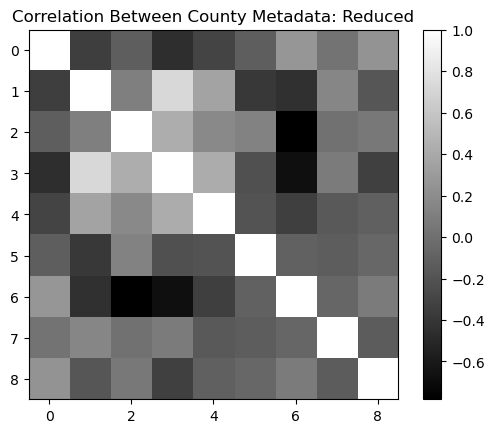

In [38]:
plt.imshow(np.corrcoef(X_red,rowvar=False), cmap="gray")
plt.colorbar()
plt.title("Correlation Between County Metadata: Reduced")
plt.savefig("corrmx2.png")
plt.show()

In [339]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_red, y_red, test_size=0.3, random_state=10)

In [39]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_red, y_red, test_size=0.3, random_state=10)

#NB
gnb3 = GaussianNB(var_smoothing=1e-3)
y_pred_nb3 = gnb3.fit(X_train3, y_train3).predict(X_test3)
nb_accuracy3 = float(np.sum([y_test3 == y_pred_nb3])/y_test3.shape[0])
print(f"Naive Bayes accuracy = {nb_accuracy3}")
print(f"NB F1 Score = {skm.f1_score(y_test3, y_pred_nb3, average='binary')}")

#LR
# Logistic Regression
lr3 = LogisticRegression(random_state=10,max_iter=1000)
y_pred_lr3 = lr3.fit(X_train3, y_train3).predict(X_test3)
lr_accuracy3 = float(np.sum(y_test3 == y_pred_lr3)/y_test3.shape[0])
print(f"Logistic Regression accuracy = {lr_accuracy3}")
print(f"LR F1 Score = {skm.f1_score(y_test3, y_pred_lr3, average='binary')}")

#KNN
for kk in range(1,11):
    knn2 = KNeighborsClassifier(n_neighbors = kk)
    y_pred_knn3 = knn2.fit(X_train3, y_train3).predict(X_test3)
    knn_accuracy3 = float(np.sum(y_test3 == y_pred_knn3)/y_test3.shape[0])
    print(f"KNN accuracy with {kk} neighbors = {knn_accuracy3}")
    print(f"KNN accuracy with {kk} neighbors = {skm.f1_score(y_test3, y_pred_knn3, average='binary')}")


lsvm3 = SVC(kernel="linear", C=0.025) #need to tune
y_pred_lsvm3 = lsvm3.fit(X_train3, y_train3).predict(X_test3)
lsvm_accuracy3 = float(np.sum(y_test3 == y_pred_lsvm3)/y_test3.shape[0])

print(f"Linear SVM accuracy = {lsvm_accuracy3}")
print(f"LSVM F1 Score = {skm.f1_score(y_test3, y_pred_lsvm3, average='binary')}")

ksvm3 = SVC(kernel="rbf", C=1) #need to tune
y_pred_ksvm3 = ksvm3.fit(X_train3, y_train3).predict(X_test3)
ksvm_accuracy3 = float(np.sum(y_test3 == y_pred_ksvm3)/y_test3.shape[0])

print(f"Kernel SVM accuracy = {ksvm_accuracy3}")
print(f"KSVM F1 Score = {skm.f1_score(y_test3, y_pred_ksvm3, average='binary')}")


print("Neural Network")
mlp3 = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=300, alpha=1e-4,

                    solver='sgd', verbose=10, random_state=1,

                    learning_rate_init=.1, tol=1e-3)

y_pred_nn3 = mlp3.fit(X_train3, y_train3).predict(X_test3)
nn_accuracy3 = float(np.sum(y_test3 == y_pred_nn3)/y_test3.shape[0])

print(f"Neural Network accuracy = {nn_accuracy3}")
print(f"NN F1 Score = {skm.f1_score(y_test3, y_pred_nn3, average='binary')}")

Naive Bayes accuracy = 0.9
NB F1 Score = 0.0
Logistic Regression accuracy = 0.9333333333333333
LR F1 Score = 0.0
KNN accuracy with 1 neighbors = 0.7333333333333333
KNN accuracy with 1 neighbors = 0.0
KNN accuracy with 2 neighbors = 0.9333333333333333
KNN accuracy with 2 neighbors = 0.0
KNN accuracy with 3 neighbors = 0.9
KNN accuracy with 3 neighbors = 0.0
KNN accuracy with 4 neighbors = 0.9333333333333333
KNN accuracy with 4 neighbors = 0.0
KNN accuracy with 5 neighbors = 0.9333333333333333
KNN accuracy with 5 neighbors = 0.0
KNN accuracy with 6 neighbors = 0.9333333333333333
KNN accuracy with 6 neighbors = 0.0
KNN accuracy with 7 neighbors = 0.9333333333333333
KNN accuracy with 7 neighbors = 0.0
KNN accuracy with 8 neighbors = 0.9333333333333333
KNN accuracy with 8 neighbors = 0.0
KNN accuracy with 9 neighbors = 0.9333333333333333
KNN accuracy with 9 neighbors = 0.0
KNN accuracy with 10 neighbors = 0.9333333333333333
KNN accuracy with 10 neighbors = 0.0
Linear SVM accuracy = 0.933333

In [40]:
y_pred_lr_lasso

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [41]:
y_test

41    0
20    0
86    0
73    0
19    0
76    0
38    0
34    0
45    0
62    0
13    0
75    0
9     0
55    0
0     0
93    0
12    0
30    0
35    0
71    0
10    0
97    0
1     0
33    0
67    1
58    0
82    1
17    1
14    0
15    1
Name: Gem, dtype: int64

In [42]:
df_metadata4.query("Gem == 1").iloc[:,:n_red-2].astype("float").describe()
#df_metadata4.info()

,"Persons under 18 years, percent","White alone, not Hispanic or Latino, percent","Households with a computer, percent, 2018-2022","High school graduate or higher, percent of persons age 25 years+, 2018-2022","Total retail sales per capita, 2017","Mean travel time to work (minutes), workers age 16 years+, 2018-2022","Persons in poverty, percent","Total employment, percent change, 2020-2021","Land area in square miles, 2020"
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000,14.000000
mean,0.230714,0.455143,0.969929,0.903929,17635.571429,30.55000,0.088429,0.038929,2687.453571
std,0.022151,0.151831,0.009417,0.040801,4364.918463,2.43429,0.024877,0.055346,5305.328017
min,0.192000,0.247000,0.958000,0.814000,12053.000000,26.80000,0.048000,-0.036000,327.800000
25%,0.218250,0.317250,0.961750,0.886500,14593.250000,28.32500,0.073500,-0.013750,435.225000
50%,0.229000,0.455500,0.967500,0.919500,17031.500000,30.70000,0.082500,0.052500,863.505000
75%,0.250250,0.598000,0.974750,0.932250,20157.750000,32.77500,0.102250,0.073250,1551.652500
max,0.264000,0.703000,0.987000,0.944000,26103.000000,33.80000,0.135000,0.110000,20068.010000


In [43]:
df_metadata4.query("Gem == 0").iloc[:,:n_red-2].astype("float").describe()

,"Persons under 18 years, percent","White alone, not Hispanic or Latino, percent","Households with a computer, percent, 2018-2022","High school graduate or higher, percent of persons age 25 years+, 2018-2022","Total retail sales per capita, 2017","Mean travel time to work (minutes), workers age 16 years+, 2018-2022","Persons in poverty, percent","Total employment, percent change, 2020-2021","Land area in square miles, 2020"
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.215058,0.466930,0.949023,0.888919,16462.085741,28.041860,0.127907,-0.003636,1239.642747
std,0.028212,0.171082,0.017012,0.047278,5993.385271,5.060446,0.043019,0.065200,1875.123832
min,0.136000,0.061000,0.905000,0.686000,6355.000000,19.900000,0.056000,-0.143000,22.660000
25%,0.200500,0.369000,0.939000,0.872250,13200.750000,24.250000,0.098500,-0.061750,430.830000
50%,0.212500,0.484500,0.952500,0.899000,15812.000000,27.300000,0.125000,-0.014500,712.915000
75%,0.228000,0.597250,0.960000,0.916750,17376.500000,31.250000,0.153500,0.052500,1094.330000
max,0.305000,0.772000,0.981000,0.952000,46267.000000,44.600000,0.276000,0.150000,9201.790000


In [44]:
df_metadata4.columns

Index(['Persons under 18 years, percent',
       'White alone, not Hispanic or Latino, percent',
       'Households with a computer, percent, 2018-2022',
       'High school graduate or higher, percent of persons age 25 years+, 2018-2022',
       'Total retail sales per capita, 2017',
       'Mean travel time to work (minutes), workers age 16 years+, 2018-2022',
       'Persons in poverty, percent',
       'Total employment, percent change, 2020-2021',
       'Land area in square miles, 2020', 'County', 'Gem'],
      dtype='object')

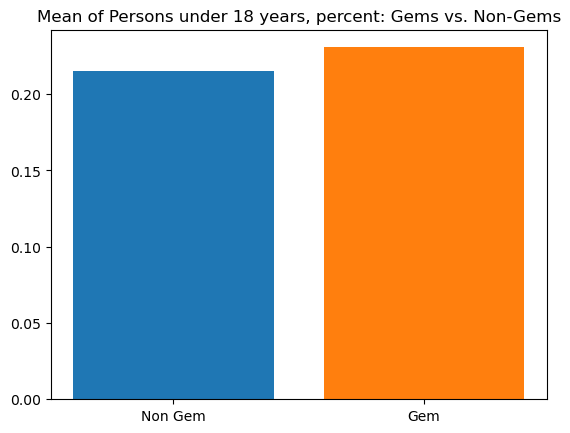

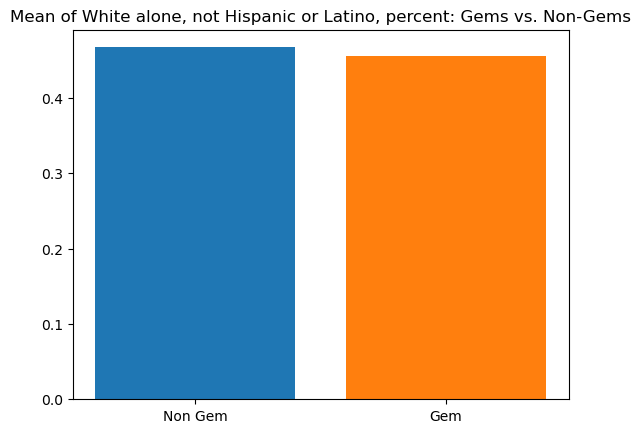

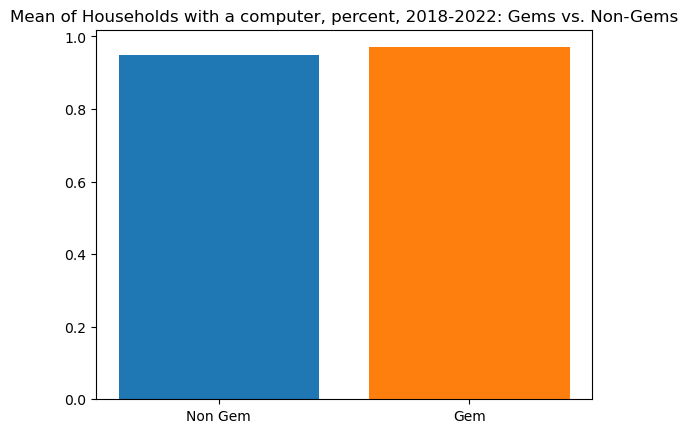

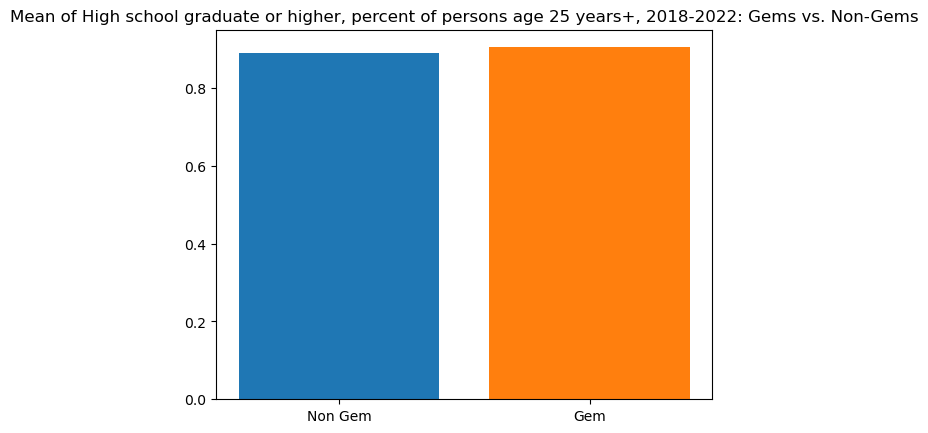

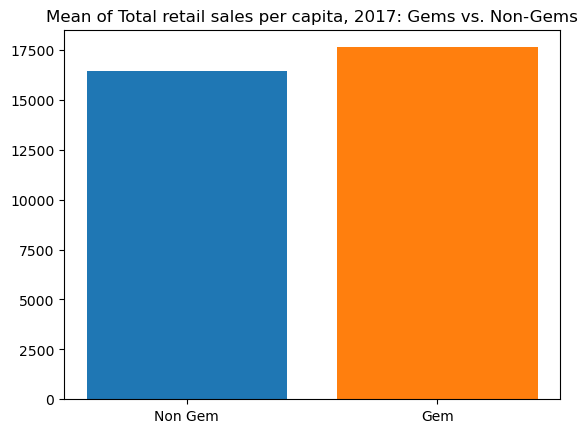

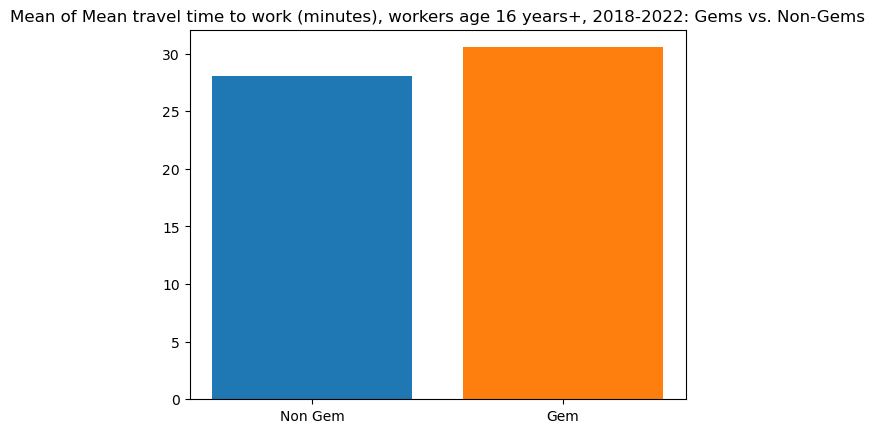

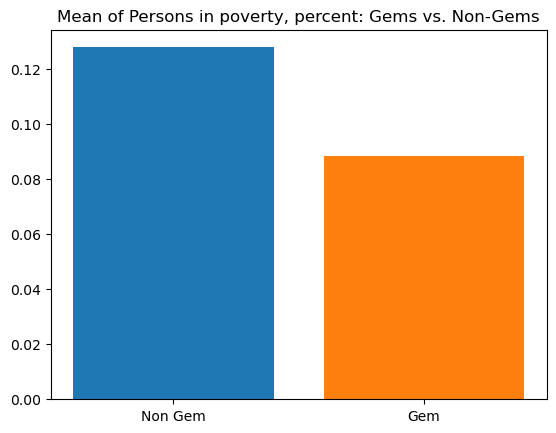

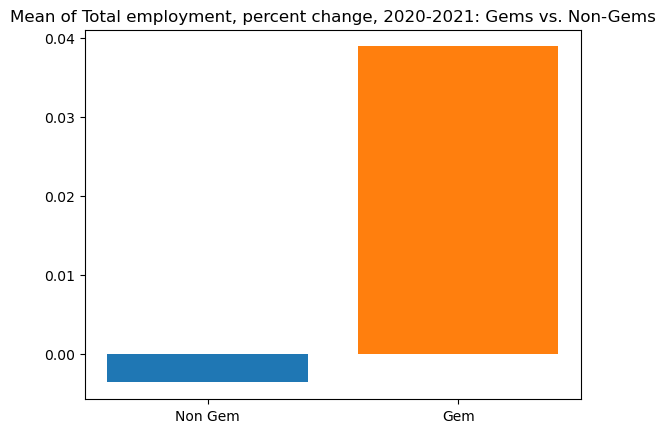

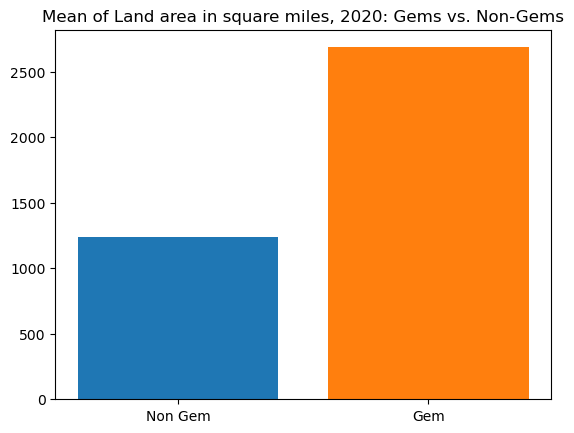

In [45]:
gem_mask = df_metadata4.Gem == 1 

#bins = numpy.linspace(-10, 10, 100)
for i in range(n_red-2):
    # plt.hist(df_metadata4.iloc[:,i][gem_mask], alpha=0.6, label='Gem')
    # plt.hist(df_metadata4.iloc[:,i][~gem_mask], alpha=0.6, label='Not Gem')
    # plt.title(f"{df_metadata4.columns[i]}: Gems vs. Non-Gems")
    # plt.legend(loc='upper right')
    # plt.show()
    plt.bar("Non Gem",np.mean(df_metadata4.iloc[:,i][~gem_mask]))
    plt.bar("Gem",np.mean(df_metadata4.iloc[:,i][gem_mask]))
    plt.title(f"Mean of {df_metadata4.columns[i]}: Gems vs. Non-Gems")
    plt.show()

In [107]:
from sklearn.svm import OneClassSVM

The test set is 0.1333333333333333 hidden gems and 0.8666666666666667 non-gems.


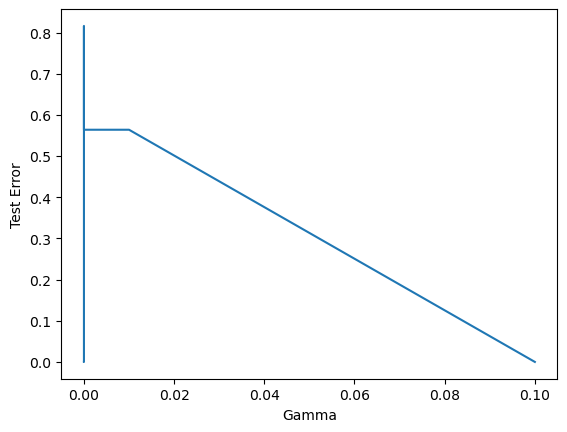

One-Class SVM test error  = 0.3


0.8163265306122449

In [329]:
#Full Data

mask = y_train == 0
X_train_one = X_train[mask,:]
y_train_one = y_train[mask]
y_test_one_mask = y_test == 0
y_test_one = y_test
y_test_one[y_test_one_mask] = 1
y_test_one[~y_test_one_mask] = -1

num_test_non_spam = np.mean(y_test_one_mask)
num_test_spam = 1 - num_test_non_spam
print(f"The test set is {num_test_spam} hidden gems and {num_test_non_spam} non-gems.")

ksvm_gamma = [1/10**i for i in range(1,21)]
ksvm_gamma_error = []
for g in ksvm_gamma:
    #print(g)
    ksvm = OneClassSVM(gamma=g, kernel='rbf')
    y_pred_ksvm = ksvm.fit(X_train_one, y_train_one).predict(X_test)
    #ksvm_gamma_error.append(float(np.sum(y_test3 != y_pred_ksvm)/y_test.shape[0]))
    ksvm_gamma_error.append(skm.f1_score(y_test, y_pred_ksvm, average='binary'))


plt.plot(ksvm_gamma, ksvm_gamma_error)
plt.xlabel("Gamma")
plt.ylabel("Test Error")
plt.show()

final_gamma = ksvm_gamma[np.argmax(ksvm_gamma_error)]
ksvm_final = OneClassSVM(gamma=final_gamma, kernel='rbf')
y_pred_ksvm = ksvm_final.fit(X_train_one, y_train_one).predict(X_test)
ksvm_error = (float(np.sum(y_test != y_pred_ksvm)/y_test.shape[0]))
print(f"One-Class SVM test error  = {ksvm_error}")
skm.f1_score(y_test_one, y_pred_ksvm, average='binary')

The test set is 0.1333333333333333 hidden gems and 0.8666666666666667 non-gems.


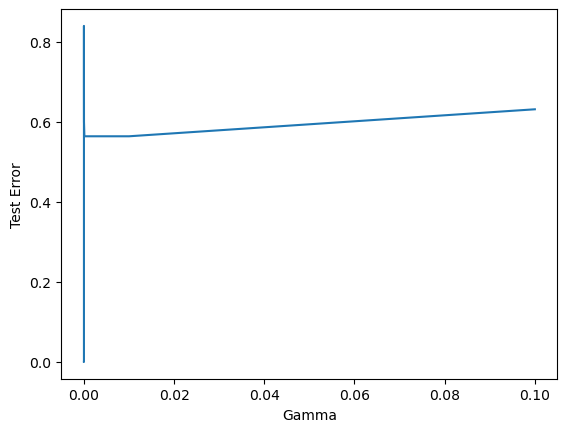

One-Class SVM test error  = 0.26666666666666666


0.84

In [335]:
#PCA

mask = y_train2 == 0
X_train_one = X_train2[mask,:]
y_train_one = y_train2[mask]
y_test_one_mask = y_test2 == 0
y_test_one = y_test2
y_test_one[y_test_one_mask] = 1
y_test_one[~y_test_one_mask] = -1

num_test_non_spam = np.mean(y_test_one_mask)
num_test_spam = 1 - num_test_non_spam
print(f"The test set is {num_test_spam} hidden gems and {num_test_non_spam} non-gems.")

ksvm_gamma = [1/10**i for i in range(1,21)]
ksvm_gamma_error = []
for g in ksvm_gamma:
    #print(g)
    ksvm = OneClassSVM(gamma=g, kernel='rbf')
    y_pred_ksvm = ksvm.fit(X_train_one, y_train_one).predict(X_test2)
    #ksvm_gamma_error.append(float(np.sum(y_test3 != y_pred_ksvm)/y_test.shape[0]))
    ksvm_gamma_error.append(skm.f1_score(y_test2, y_pred_ksvm, average='binary'))


plt.plot(ksvm_gamma, ksvm_gamma_error)
plt.xlabel("Gamma")
plt.ylabel("Test Error")
plt.show()

final_gamma = ksvm_gamma[np.argmax(ksvm_gamma_error)]
ksvm_final = OneClassSVM(gamma=final_gamma, kernel='rbf')
y_pred_ksvm = ksvm_final.fit(X_train_one, y_train_one).predict(X_test2)
ksvm_error = (float(np.sum(y_test2 != y_pred_ksvm)/y_test2.shape[0]))
print(f"One-Class SVM test error  = {ksvm_error}")
skm.f1_score(y_test_one, y_pred_ksvm, average='binary')

The test set is 0.06666666666666665 hidden gems and 0.9333333333333333 non-gems.


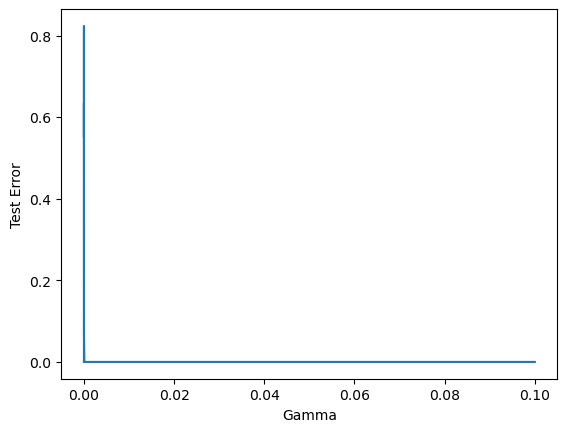

One-Class SVM test error  = 0.3


0.8235294117647058

In [343]:
mask = y_train3 == 0
X_train_one = X_train3[mask,:]
y_train_one = y_train3[mask]
y_test_one_mask = y_test3 == 0
y_test_one = y_test3
y_test_one[y_test_one_mask] = 1
y_test_one[~y_test_one_mask] = -1

num_test_non_spam = np.mean(y_test_one_mask)
num_test_spam = 1 - num_test_non_spam
print(f"The test set is {num_test_spam} hidden gems and {num_test_non_spam} non-gems.")

ksvm_gamma = [1/10**i for i in range(1,21)]
ksvm_gamma_error = []
for g in ksvm_gamma:
    #print(g)
    ksvm = OneClassSVM(gamma=g, kernel='rbf')
    y_pred_ksvm = ksvm.fit(X_train_one, y_train_one).predict(X_test3)
    #ksvm_gamma_error.append(float(np.sum(y_test3 != y_pred_ksvm)/y_test.shape[0]))
    ksvm_gamma_error.append(skm.f1_score(y_test3, y_pred_ksvm, average='binary'))


plt.plot(ksvm_gamma, ksvm_gamma_error)
plt.xlabel("Gamma")
plt.ylabel("Test Error")
plt.show()

final_gamma = ksvm_gamma[np.argmax(ksvm_gamma_error)]
ksvm_final = OneClassSVM(gamma=final_gamma, kernel='rbf')
y_pred_ksvm = ksvm_final.fit(X_train_one, y_train_one).predict(X_test3)
ksvm_error = (float(np.sum(y_test3 != y_pred_ksvm)/y_test.shape[0]))
print(f"One-Class SVM test error  = {ksvm_error}")
skm.f1_score(y_test_one, y_pred_ksvm, average='binary')

In [345]:
y_test3

19    1
14    1
43    1
37    1
66    1
3     1
79   -1
41    1
38    1
68    1
2     1
1     1
60    1
53    1
95    1
74    1
92    1
26    1
59   -1
46    1
90    1
70    1
50    1
44    1
76    1
55    1
21    1
61    1
6     1
63    1
Name: Gem, dtype: int64